In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from api_key import api_key

from citipy import citipy

output_data_file = "output_dat/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        

#cities = cities[:10]
#cities


In [76]:
appid={api_key}
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"   
query_url = (f"{url}appid={api_key}&units={units}&q=") 

temp = [] #Temperature (F) vs. Latitu&e
humid = []    #Humidity (%) vs. Latitude
cloud = []    #Cloudiness (%) vs. Latitude
wind = []    #Wind Speed (mph) vs. Latitude
lat = []
lon = []
count = 0
for place in cities:
    
    response = requests.get(f"{query_url}{place}").json()
    count +=1
    print(f" Fethching record {count} of Set 1 | {place}")
    try:
        lat.append(response["coord"]["lat"])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
    except:
        print("City not found...skipping")
        lat.append("NA")
        lon.append("NA")
        temp.append("NA")
        humid.append("NA")
        cloud.append("NA")
        wind.append("NA")

weather = pd.DataFrame({"city" :cities,
                        "Latitude" : lat,
                        "Longitude" : lon,
                        "Temperature" : temp,
                        "Humidity" : humid,
                        "Cloud" : cloud,
                        "Wind" : wind})


 Fethching record 1 of Set 1 | omboue
 Fethching record 2 of Set 1 | vaini
 Fethching record 3 of Set 1 | hermanus
 Fethching record 4 of Set 1 | jiazi
 Fethching record 5 of Set 1 | barrow
 Fethching record 6 of Set 1 | sao joao da barra
 Fethching record 7 of Set 1 | acajutla
 Fethching record 8 of Set 1 | galeana
 Fethching record 9 of Set 1 | kuche
City not found...skipping
 Fethching record 10 of Set 1 | norman wells
 Fethching record 11 of Set 1 | esperance
 Fethching record 12 of Set 1 | fortuna
 Fethching record 13 of Set 1 | puerto ayora
 Fethching record 14 of Set 1 | hithadhoo
 Fethching record 15 of Set 1 | busselton
 Fethching record 16 of Set 1 | jiroft
City not found...skipping
 Fethching record 17 of Set 1 | bukoba
 Fethching record 18 of Set 1 | mys shmidta
City not found...skipping
 Fethching record 19 of Set 1 | praia da vitoria
 Fethching record 20 of Set 1 | kiruna
 Fethching record 21 of Set 1 | phan thiet
 Fethching record 22 of Set 1 | rikitea
 Fethching record 

In [ ]:
weather = weather[~weather.eq("NA").any(1)] #would this delete a city that had "na" comination of letter in it?
weather.to_csv("weather.csv")

In [134]:
print(weather)
weather.count()


                      city Latitude Longitude Temperature Humidity Cloud  \
0                   omboue    -1.57      9.26        79.4      100    80   
1                    vaini    15.34     74.49        75.2       36     0   
2                 hermanus   -34.42     19.24       60.54       79     8   
3                    jiazi    19.61    110.49          77       83    75   
4                   barrow   -38.31    -60.23       44.84       82     0   
5        sao joao da barra   -21.64    -41.05       78.45       99    68   
6                 acajutla    13.59    -89.83       76.83       56    36   
7                  galeana    24.83   -100.08       35.07       90     0   
9             norman wells    65.28   -126.83      -34.61       65    75   
10               esperance    10.24    -61.45        75.2       88     0   
11                 fortuna    38.18     -1.13        39.2       51     0   
12            puerto ayora    -0.74    -90.35       74.99      100    56   
13          

city           562
Latitude       562
Longitude      562
Temperature    562
Humidity       562
Cloud          562
Wind           562
dtype: int64

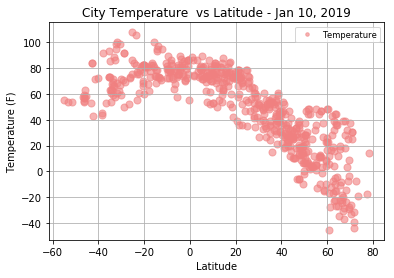

In [135]:
#Temperature F vs Latitude

plt.scatter(weather["Latitude"], weather["Temperature"],  color = city_color["Urban"], s = 50, alpha=0.6, label = "Temperature", linewidth = 1)

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.legend(loc = "best", fontsize = "small", scatterpoints = 1,  markerscale= .5, scatteryoffsets=[0.5, 0.5, 0.75], fancybox = True)
plt.title("City Temperature  vs Latitude - Jan 10, 2019")
plt.savefig("Images/Temp.png")
plt.show()

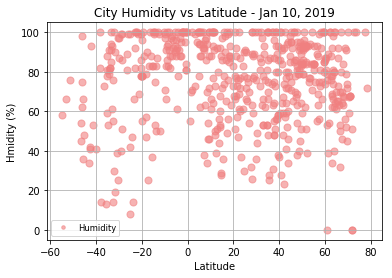

In [136]:
plt.scatter(weather["Latitude"], weather["Humidity"],  color = city_color["Urban"], s = 50, alpha=0.6, linewidth = 1)

plt.grid()
plt.xlabel( "Latitude")
plt.ylabel("Hmidity (%)")
plt.legend(loc = "best", fontsize = "small", scatterpoints = 1,  markerscale= .5, scatteryoffsets=[0.5, 0.5, 0.75], fancybox = True)

plt.title("City Humidity vs Latitude - Jan 10, 2019")
plt.savefig("Images/Humidity.png")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

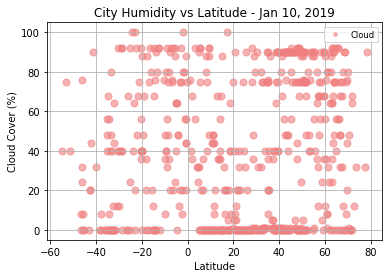

In [137]:
plt.scatter(weather["Latitude"], weather["Cloud"],  color = city_color["Urban"], s = 50, alpha=0.6, linewidth = 1)

plt.grid()
plt.xlabel("Latitude" )
plt.ylabel("Cloud Cover (%)")
plt.legend(loc = "best", fontsize = "small", scatterpoints = 1,  markerscale= .5, scatteryoffsets=[0.5, 0.5, 0.75], fancybox = True)
plt.title("City Humidity vs Latitude - Jan 10, 2019")
plt.savefig("Images/Clouds.png")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

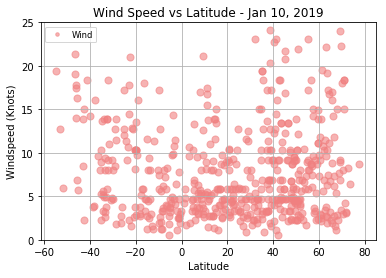

In [138]:
plt.scatter(weather["Latitude"], weather["Wind"],  vmax= 35,  color = city_color["Urban"], s = 50, alpha=0.6, linewidth = 1)

plt.grid()
plt.xlabel("Latitude" )
plt.ylabel("Windspeed (Knots)")
plt.legend(loc = "best", fontsize = "small", scatterpoints = 1,  markerscale= .5, scatteryoffsets=[0.5, 0.5, 0.75], fancybox = True)

plt.title("Wind Speed vs Latitude - Jan 10, 2019")
plt.ylim(top = 25, bottom = 0)
plt.savefig("Images/Wind.png")

plt.show

Pretty printing has been turned OFF


NameError: name 'response' is not defined